# Trans Effect Pancan Pearson Correlations 

This notebook graphs pearson correlations between EGFR proteomics and PLAU for supplemental figure. It also calculates the average pearson correlation and p value across all of the cancer types.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load all cptac cancers
brain = cptac.Gbm()
ccrcc = cptac.Ccrcc()
en = cptac.Endometrial()
hnscc = cptac.Hnscc()
colon = cptac.Colon()
brca = cptac.Brca()
luad = cptac.Luad()
Ovar = cptac.Ovarian()
Lscc = cptac.Lscc()

In [4]:
#cptac version
cptac.version()

'0.8.6'

In [5]:
trans_gene = "PPP2R3A"

In [41]:
'''
@Param df1: Dataframe. Contains numeric values (such as proteomics) for pearson correlaton 
@Param x_axis: String. Used as the label for the x-axis as well as the column name for the x-axis values.
@Param y_axis:String. Used as the label for the y-axis as well as the column name for the y-axis values.
This fuction takes a dataframe with numeric values (such as proteomics) and performs a pearson correlation analysis
between two user specified columns within the dataframe. 
The function then prints the uncorrected pvalue and coorelation value.

'''
def pearson_stats(df1, x_axis, y_axis, print_stats = True):
      
    df1_subset = df1[[x_axis,y_axis]]
    df1_subset = df1_subset.dropna(axis=0, how="any")
    count_row = df1_subset.shape[0]
    if count_row > 20:
        x1 = df1_subset[[x_axis]].values
        y1 = df1_subset[[y_axis]].values
        x1 = x1[:,0]
        y1 = y1[:,0]
        corr, pval = scipy.stats.pearsonr(x1,y1)
        if print_stats:
            print("Correlation: " + str(corr))
            print("P_value:" + str(pval))
        
        else:
            return [corr,pval]
        
    else: 
        return "Not Enough Data"
   

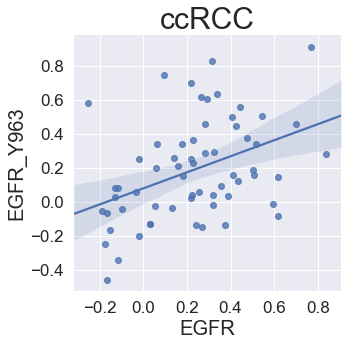

Correlation: 0.41424412235188934
P_value:0.0008165811878911165


In [21]:
phospho_gene = ccrcc.get_phosphoproteomics_gene("tumor")

phospho_site = ccrcc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith("EGFR")]]
phospho_gene_site = phospho_gene.merge(phospho_site, on = "Patient_ID")
       
p.plot_pearson(phospho_gene_site,"EGFR","EGFR_Y963" , "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_gene_site,"EGFR","EGFR_Y963")


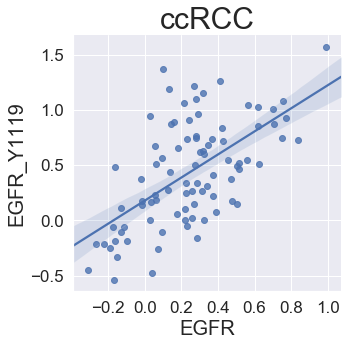

Correlation: 0.6061692846888276
P_value:3.8908871424731797e-10


In [22]:
phospho_gene = ccrcc.get_phosphoproteomics_gene("tumor")

phospho_site = ccrcc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
        phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith("EGFR")]]
phospho_gene_site = phospho_gene.merge(phospho_site, on = "Patient_ID")
       
p.plot_pearson(phospho_gene_site,"EGFR","EGFR_Y1119" , "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_gene_site,"EGFR","EGFR_Y1119")


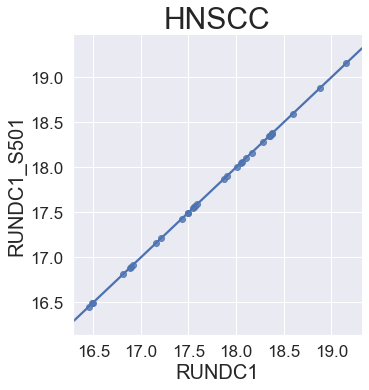

Correlation: 1.0
P_value:0.0


,RUNDC1_S499,RUNDC1_S501,RUNDC1_S71,RUNDC1_T321,RUNDC1
Patient_ID,,,,,
C3N-03783,NaN,NaN,16.168553,NaN,16.168553
C3N-03785,15.420805,NaN,16.219715,NaN,15.820260
C3N-03837,17.011724,NaN,16.065719,NaN,16.538721
C3N-03841,NaN,16.454124,NaN,NaN,16.454124
C3N-03849,NaN,16.916904,NaN,NaN,16.916904
C3N-03876,NaN,NaN,15.909233,13.320905,14.615069
C3N-03878,NaN,NaN,15.286660,13.678558,14.482609
C3N-03888,NaN,NaN,16.712975,NaN,16.712975
C3N-03889,NaN,NaN,NaN,NaN,NaN


In [49]:
site = "RUNDC1_S501"
gene = "RUNDC1"
phospho_site = hnscc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = phospho_site.dropna(thresh=20, axis=1)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith(gene)]]
    
phospho_site[gene] = phospho_site.mean(numeric_only=True, axis=1)
p.plot_pearson(phospho_site,gene,site , "none", title = "HNSCC", ra_stats = False, show_plot = True)
pearson_stats(phospho_site,gene,site)
phospho_site.tail(20)

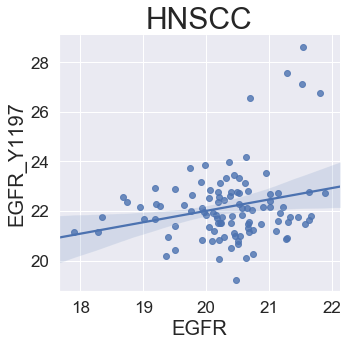

Correlation: 0.2415008689836045
P_value:0.013521069828083892


In [36]:
gene = "EGFR"
phospho_site = hnscc.get_phosphoproteomics("tumor")
if isinstance(phospho_site.keys(), pd.core.indexes.multi.MultiIndex):
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
    phospho_site = u.reduce_multiindex(phospho_site, levels_to_drop = 2)
phospho_site.columns =phospho_site.columns.map('_'.join)
phospho_site = phospho_site[phospho_site.columns[pd.Series(phospho_site.columns).str.startswith(gene)]]
    
phospho_site["EGFR"] = phospho_site.mean(numeric_only=True, axis=1)
p.plot_pearson(phospho_site,"EGFR","EGFR_Y1197" , "none", title = "HNSCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Hnscc_PPP2R3A")
pearson_stats(phospho_site,"EGFR","EGFR_Y1197")


In [37]:
phospho_site

,EGFR_S1025,EGFR_S1026,EGFR_S1037,EGFR_S1037,EGFR_S1037,EGFR_S1037,EGFR_S1039,EGFR_S1039,EGFR_S1039,EGFR_S1039,...,EGFR_T1041S1042,EGFR_T1041S1042S1045,EGFR_T693,EGFR_T693S695,EGFR_Y1092,EGFR_Y1110,EGFR_Y1172,EGFR_Y1197,EGFR_Y727,EGFR
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00977,NaN,20.395124,NaN,NaN,NaN,NaN,21.431779,NaN,21.431779,NaN,...,NaN,NaN,24.997413,16.759494,17.473013,NaN,20.292057,23.960771,NaN,20.353568
C3L-00987,NaN,19.476265,NaN,NaN,NaN,NaN,21.370258,NaN,21.370258,NaN,...,NaN,NaN,24.972598,NaN,NaN,NaN,18.218061,21.464089,NaN,20.869124
C3L-00994,NaN,20.330855,NaN,NaN,NaN,NaN,21.663512,NaN,21.663512,NaN,...,NaN,NaN,25.108932,16.400183,16.886517,NaN,19.119405,22.517973,NaN,20.049603
C3L-00995,NaN,20.804486,NaN,NaN,NaN,NaN,21.365725,NaN,21.365725,NaN,...,NaN,NaN,24.685663,NaN,NaN,NaN,NaN,22.753777,NaN,21.625949
C3L-00997,NaN,19.846468,NaN,NaN,NaN,NaN,20.980979,NaN,20.980979,NaN,...,19.057331,NaN,24.542378,NaN,NaN,16.956105,18.056164,21.358591,NaN,20.042440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-04277,NaN,20.768842,16.427398,NaN,16.427398,NaN,21.909688,NaN,21.909688,NaN,...,18.943252,NaN,25.162300,NaN,NaN,18.134882,NaN,23.335068,NaN,20.318257
C3N-04278,NaN,19.755769,NaN,NaN,NaN,NaN,21.313582,NaN,21.313582,NaN,...,18.395802,NaN,24.466973,NaN,NaN,NaN,NaN,21.584917,NaN,21.130783
C3N-04279,15.382474,20.174757,NaN,NaN,NaN,NaN,21.383032,NaN,21.383032,NaN,...,NaN,NaN,25.251304,NaN,NaN,18.366149,19.220107,22.176533,NaN,20.906251


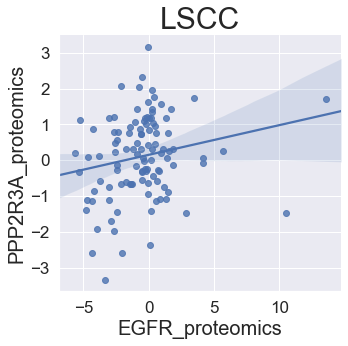

Correlation: 0.19768006837523816
P_value:0.040293244302991166


In [11]:
lscc_df = Lscc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=["EGFR",trans_gene], tissue_type= "tumor")
lscc_df.columns = lscc_df.columns.droplevel(1)
p.plot_pearson(lscc_df,"EGFR_proteomics",trans_gene + "_proteomics", "none", title = "LSCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Lscc_PPP2R3A")
pearson_stats(lscc_df,"EGFR_proteomics",trans_gene + "_proteomics")


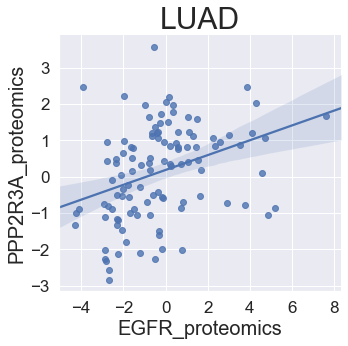

Correlation: 0.34848983092184055
P_value:0.0001907963076161991


In [12]:
luad_df = luad.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=[trans_gene,"EGFR"], tissue_type= "tumor")
luad_df.columns = luad_df.columns.droplevel(1)
p.plot_pearson(luad_df,"EGFR_proteomics",trans_gene + "_proteomics", "none", title = "LUAD", ra_stats = False, show_plot = True,save_file_name= "png_files/Luad_PPP2R3A")
pearson_stats(luad_df,"EGFR_proteomics", trans_gene + "_proteomics")


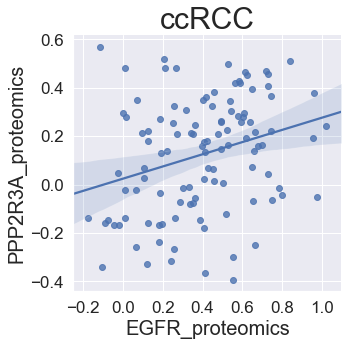

Correlation: 0.28573499558630844
P_value:0.002478698706862031


In [13]:
ccrcc_df = ccrcc.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=[trans_gene,"EGFR"], tissue_type= "tumor")
ccrcc_df.columns = ccrcc_df.columns.droplevel(1)
p.plot_pearson(ccrcc_df,"EGFR_proteomics",trans_gene + "_proteomics", "none", title = "ccRCC", ra_stats = False, show_plot = True,save_file_name= "png_files/Renal_PPP2R3A")
pearson_stats(ccrcc_df,"EGFR_proteomics", trans_gene + "_proteomics")


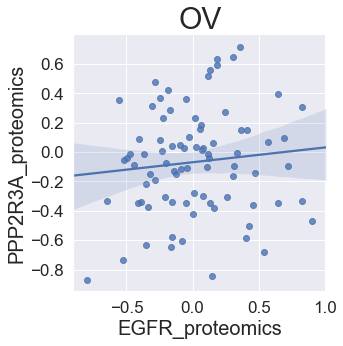

Correlation: 0.10383035591614785
P_value:0.35024109210892534


In [14]:
ovar_df = Ovar.join_omics_to_mutations(omics_df_name="proteomics", mutations_genes="EGFR",
omics_genes=[trans_gene,"EGFR"], tissue_type= "tumor")
ovar_df.columns = ovar_df.columns.droplevel(1)
p.plot_pearson(ovar_df,"EGFR_proteomics",trans_gene + "_proteomics", "none", title = "OV", ra_stats = False, show_plot = True,save_file_name= "png_files/Ovarian_PPP2R3A")
pearson_stats(ovar_df,"EGFR_proteomics",trans_gene + "_proteomics")


# Average P value and Correlation 

The manuscript mentions that the average correlation for PLAU is 0.166. This is derivation of that number

In [15]:
alldf = [hnscc_df, luad_df, lscc_df, ccrcc_df, colon_df, brca_df, gbm_df, ovar_df]
all_pval = []
all_corr = []

for df in alldf:
   
    stats = pearson_stats(df,"EGFR_proteomics","PLAU_proteomics", print_stats=False)
    all_corr.append(stats[0])
    all_pval.append(stats[1])

    

KeyError: "['PLAU_proteomics'] not in index"

In [ ]:
print("Avg correlation: " + str(stat.mean(all_corr)))
print("Avg p value: " + str(stat.mean(all_pval)))

In [ ]:
ccrcc.get_phosphoproteomics_gene